# Flow labeled dataset exploration (updated @ 20200324)

In [1]:
# import packages
import os

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
# Cofacts pre-defined classes
label_class_dict = {'0中國影響力':0, '1性少數與愛滋病':1, '2女權與性別刻板印象':2, '3保健秘訣、食品安全':3, '4基本人權問題':4,
               '5農林漁牧政策':5, '6能源轉型':6, '7環境生態保護':7, '8政府優惠措施、新法規、政策宣導':8, '9科技、資安、隱私':9,
               '10免費訊息詐騙':10, '11有意義但不包含在以上標籤':11, '12無意義':12, '13廣告':13, 
               '14只有網址其他資訊不足':14, '15政治、政黨':15, '16 捐款、尋求公眾協助':16}

In [3]:
# record file names
repos = ['./11110267_20200313_115124', './11110267_20200320_214620', './11110267_20200324_133011']
dates = ['0313', '0320', '0324']

repo_files = []
for repo in repos:
    files = os.listdir(repo)
    files = [file for file in files if 'json' in file]
    
    repo_files.append(files)

    print('There are '+ str(len(files)) +' files in '+repo )


There are 2331 files in ./11110267_20200313_115124
There are 8447 files in ./11110267_20200320_214620
There are 14908 files in ./11110267_20200324_133011


In [14]:
# load tags information in each repo
# encoding: utf-8
import json

repo_class_count_dict = []
repo_tag_count_dict = []

repo_class_count_list = []
repo_tag_count_list = []

repo_num = 0
for files in repo_files:
    
    class_count_dict = {}
    tag_count_dict = {}
    
    for file in files:
        with open(os.path.join(repos[repo_num], file), 'r') as f:
            data = json.load(f)

        tags = data['tags']

        # count how many tags first
        if len(tags) not in tag_count_dict.keys():
            tag_count_dict[len(tags)] = 1
        else:
            tag_count_dict[len(tags)] +=1


        # count each class
        for tag in tags:
            if tag not in class_count_dict.keys():
                class_count_dict[tag] = 1
            else:
                class_count_dict[tag] +=1              

    print(tag_count_dict)
    print(class_count_dict)

    # turn into list 
    tag_count_list = [0]*len(tag_count_dict)
    class_count_list = [0]*len(class_count_dict)

    for tag_key in tag_count_dict.keys():
        tag_count_list[tag_key-1] = tag_count_dict[tag_key]

    for class_key in class_count_dict.keys():
        class_count_list[class_key] = class_count_dict[class_key]

    print(tag_count_list)
    print(class_count_list)

    repo_class_count_dict.append(class_count_dict)
    repo_tag_count_dict.append(tag_count_dict)

    repo_class_count_list.append(class_count_list)
    repo_tag_count_list.append(tag_count_list)
    
    repo_num += 1

print(repo_class_count_list)

{1: 2158, 2: 168, 3: 5}
{14: 513, 11: 310, 3: 537, 8: 140, 13: 128, 1: 18, 7: 25, 12: 240, 9: 67, 10: 185, 2: 19, 16: 28, 0: 55, 15: 196, 6: 20, 5: 21, 4: 7}
[2158, 168, 5]
[55, 18, 19, 537, 7, 21, 20, 25, 140, 67, 185, 310, 240, 128, 513, 196, 28]
{1: 7772, 2: 619, 3: 56}
{15: 1039, 14: 2281, 11: 1096, 12: 469, 3: 1935, 8: 512, 13: 437, 1: 89, 7: 110, 10: 498, 6: 72, 2: 45, 9: 163, 16: 83, 0: 289, 5: 45, 4: 15}
[7772, 619, 56]
[289, 89, 45, 1935, 15, 45, 72, 110, 512, 163, 498, 1096, 469, 437, 2281, 1039, 83]
{1: 13699, 2: 1138, 3: 71}
{15: 1648, 14: 4152, 11: 1772, 13: 880, 9: 427, 10: 882, 12: 637, 3: 3473, 8: 1047, 5: 66, 0: 547, 1: 142, 7: 141, 16: 157, 6: 116, 2: 76, 4: 25}
[13699, 1138, 71]
[547, 142, 76, 3473, 25, 66, 116, 141, 1047, 427, 882, 1772, 637, 880, 4152, 1648, 157]
[[55, 18, 19, 537, 7, 21, 20, 25, 140, 67, 185, 310, 240, 128, 513, 196, 28], [289, 89, 45, 1935, 15, 45, 72, 110, 512, 163, 498, 1096, 469, 437, 2281, 1039, 83], [547, 142, 76, 3473, 25, 66, 116, 141, 104

In [19]:
# using dataframe to process tags data
df_tag = []
df_class = []

for repo_num in range(len(repo_tag_count_list)):
    
    df_tag.append(pd.DataFrame( {'tag_count': repo_tag_count_list[repo_num]}, dtype=np.int64))
    df_tag[repo_num].index +=1

    df_class.append(pd.DataFrame( {'class_count': repo_class_count_list[repo_num]}, dtype=np.int64))
    df_class[repo_num].index +=1

    df_tag[repo_num]['percent'] = df_tag[repo_num]['tag_count'].div(df_tag[repo_num]['tag_count'].sum())*100
    df_class[repo_num]['percent'] = df_class[repo_num]['class_count'].div(df_class[repo_num]['class_count'].sum())*100


In [20]:
# latest data overview
df_tag[2].head()

,tag_count,percent
1,13699,91.890260
2,1138,7.633485
3,71,0.476254


In [28]:
df_class[2].head(n=len(df_class[2]))

,class_count,percent
1,547,3.379046
2,142,0.877193
3,76,0.469484
4,3473,21.454164
5,25,0.154435
6,66,0.407709
7,116,0.716580
8,141,0.871016
9,1047,6.467754
10,427,2.637756


Text(0, 0.5, 'Percent (%)')

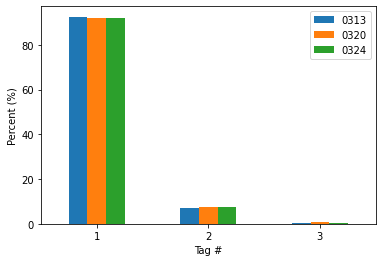

In [22]:
# plot tags distribution
plot_dict = {}

for repo_num in range(len(repo_tag_count_list)):
    plot_dict[dates[repo_num]] = df_tag[repo_num]['percent']

df = pd.DataFrame(plot_dict)
ax = df.plot.bar(rot=0)

ax.set_xlabel("Tag #")
ax.set_ylabel("Percent (%)")


Text(0, 0.5, 'Percent (%)')

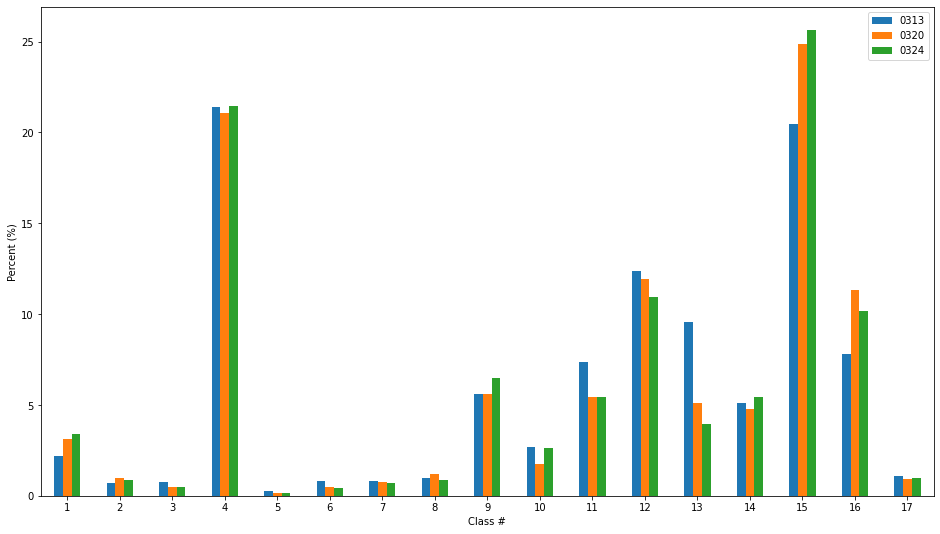

In [23]:
# plot class distribution
plot_dict = {}

for repo_num in range(len(repo_tag_count_list)):
    plot_dict[dates[repo_num]] = df_class[repo_num]['percent']

df = pd.DataFrame(plot_dict)
ax = df.plot.bar(rot=0, figsize=(16,9))

ax.set_xlabel("Class #")
ax.set_ylabel("Percent (%)")


## Check Class #14

In [24]:
check_class = 14
check_article_num = 100
check_count = 0
check_repo_num = 2

# only latest repo check
lines = []
split_symbol = '=========================================='

for file in repo_files[1]:
    with open(os.path.join(repos[check_repo_num], file), 'r') as f:
        data = json.load(f)

    tags = data['tags']
    text = data['text']
    # check class
    if check_class in tags and check_count < check_article_num:
        check_count+=1
        lines.append(split_symbol + '\n')
        lines.append('File name: '+ file +'\n')
        lines.append('Tags:'+ str(tags) +'\n')
        lines.append('Text: '+ text +'\n')
        lines.append(split_symbol + '\n')
        
        print(split_symbol)
        print('File name: '+ file)
        print('Tags:' + str(tags))
        print('Text: ' + text)
        print(split_symbol)
        
with open('Check_class_'+str(check_class)+'.txt', 'w') as f:
    f.writelines(lines)
                     

File name: 29289.json
Tags:[14]
Text: https://today.line.me/TW/article/X3wlwe?utm_source=lineshare
File name: 26486.json
Tags:[14]
Text: https://news.ebc.net.tw/News/world/182304?from=webpush&fbclid=IwAR1mJjE6U_rhrpA4TJA9oVuJzZbU6NzauE8WNnQ8QW4zZ706hJyb325L4no
File name: 29773.json
Tags:[14]
Text: 為什麼所有的人都不該使用機場的USB充電站：https://youtu.be/oKeMyOH2zFc
File name: 30102.json
Tags:[14]
Text: https://www.twgreatdaily.com/cat57/node1981718
File name: 16460.json
Tags:[14]
Text: 吃了30年的花蛤才知道，只需兩枚硬幣，不用洗花蛤就會自動吐沙！：https://youtu.be/eJK8NiFR1Oo
File name: 29323.json
Tags:[14]
Text: https://youtu.be/jqY1ep3ofIo
File name: 28162.json
Tags:[14]
Text: 總統被圍剿，護院全落跑⋯⋯

https://youtu.be/3voaMjkqIxI
File name: 30801.json
Tags:[14]
Text: 花博豐原跟外埔兩個園區，第五天就開始沒人了

花博豐原園區人潮稀落 攤販等嘸人「租約到就不擺了」
https://udn.com/news/story/7266/3465977

花博開幕進入第5天   外埔園區人潮稀落
https://tw.mobi.yahoo.com/news/%E8%8A%B1%E5%8D%9A%E9%96%8B%E5%B9%95%E9%80%B2%E5%85%A5%E7%AC%AC5%E5%A4%A9-%E5%A4%96%E5%9F%94%E5%9C%92%E5%8D%80%E4%BA%BA%E6%BD%AE%E7%A8%80

File name: 25290.json
Tags:[14]
Text: https://youtu.be/Uu_-StstUqk
File name: 30991.json
Tags:[14]
Text: http://iostvbox.com/view2/56378/
File name: 28158.json
Tags:[14]
Text: https://youtu.be/YFEqHnOoY2I
File name: 27307.json
Tags:[14]
Text: http://new.cocomall.tw/?product_id=769976301&coll_id=103126112&from=line&ldtag_cl=0CCH8X4XRWmhRm44UmPE_QAA


## Random check articles

In [25]:
check_rate = 0.02
check_repo_num = 2
check_article_num = int(len(repo_files[check_repo_num])*check_rate)
check_count = 0


check_article_id = np.random.randint(0, len(repo_files[1]), size=check_article_num)

# only latest repo check
lines = []
split_symbol = '=========================================='

lines.append('Total check articles:'+ str(check_article_num) + '\n')
lines.append('Check rate:'+ str(check_rate) + '\n')

print('Total check articles:'+ str(check_article_num) + '\n')
print('Check rate:'+ str(check_rate) + '\n')

for article_id in check_article_id:
    with open(os.path.join(repos[check_repo_num], repo_files[check_repo_num][article_id]), 'r') as f:
        data = json.load(f)

    tags = data['tags']
    text = data['text']

    check_count+=1
    
    lines.append(split_symbol + '\n')
    lines.append('Check No:'+ str(check_count) +'\n')
    lines.append('File name: '+ file +'\n')
    lines.append('Tags:'+ str(tags) +'\n')
    lines.append('Text: '+ text +'\n')
    lines.append(split_symbol + '\n')

    print(split_symbol)
    print('Check No:'+ str(check_count) +'\n')
    print('File name: '+ file)
    print('Tags:' + str(tags))
    print('Text: ' + text)
    print(split_symbol)
        
with open('Check_random_rate_'+str(check_rate)+'.txt', 'w') as f:
    f.writelines(lines)

Total check articles:298

Check rate:0.02

Check No:1

File name: 29422.json
Tags:[10]
Text: LINE免費貼圖-福氣吉祥貓
只有一天!免費下載▼
https://goo.gl/c5MQik
Check No:2

File name: 29422.json
Tags:[14]
Text: https://www.facebook.com/twdexker/posts/1912141912362299:0
Check No:3

File name: 29422.json
Tags:[11]
Text: 國三 斜張橋 車禍封路 南下車道 注意駕駛
Check No:4

File name: 29422.json
Tags:[11]
Text: 緊急通知： 

    震驚！太可怕了！煮熟的粽子千萬不要直接吃，轉起來，讓更多的人知道。經農科院數名專家及幾千萬例臨床聯合實驗表明，無論是城市還是農村，無論是大鐵鍋還是電飯鍋、蒸飯機煮的，千萬不要馬上直接吃！一定要⋯⋯⋯等我來了才可以吃，因為直接吃的話、燙得很！

(hahaha)(hahaha)(hahaha)提前祝各位端午節快樂
Check No:5

File name: 29422.json
Tags:[14]
Text: https://www.techbang.com/posts/17780-one-click-root-and-recover-full-control-over
Check No:6

File name: 29422.json
Tags:[11]
Text: 加油時玩手機 電磁波引爆
Check No:7

File name: 29422.json
Tags:[15]
Text: 大家午安！今天香港的情勢令人擔心，也再次提醒了我們，民主自由何其珍貴。而堅實的國防戰力，就是確保國家主權、守護民主自由生活，最好的屏障。
　　
九三軍人節是屬於國軍的重要日子，早上我參加軍人節表揚大會，把獎項一一頒發給國軍弟兄姊妹，肯定大家的貢獻和付出。👍
　　
身為三軍統帥，三年多來，我很榮幸能和國軍官兵一起捍衛國家，全面提升國防能量！軍民一心，讓我們和國軍弟兄姊妹們站在一起，為每一位軍人加油，為中華民國國軍加油！💪

🔗

### This notebook is for data exploration